In [211]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.cm as cm
from scipy.spatial.distance import cdist
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse
from scipy import linalg
import pandas as pd


# Dataset1- Wine Dataset (Sklearn) Name Of Wine classifcation

In [212]:
from sklearn.datasets import load_wine
X_1,Y = load_wine(return_X_y=True)
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X_1)


# **K-means followed by PCA**






 

In [213]:
## kmeans ##

def Kmeans(X,num_clusters_to_check):

    k_means_models = [] #clusters
    inertias_distance_summation = []

    for k in range(1,num_clusters_to_check+1):
      k_means = KMeans(n_clusters=k,random_state = 21,n_init=10)
      k_means.fit(X)
      k_means_models.append(k_means)
      inertias_distance_summation.append(k_means.inertia_)

    k_means_models = np.array(k_means_models)
    inertias_distance_summation = np.array(inertias_distance_summation)

    return k_means_models,inertias_distance_summation




In [214]:
num_clusters_to_check = 10
k_means_models,inertias_distance_summation = Kmeans(X,num_clusters_to_check)
print(k_means_models.shape)
print(inertias_distance_summation.shape)

(10,)
(10,)


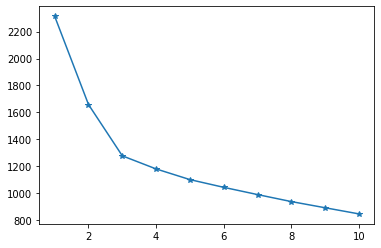

In [215]:
# elbow method
plt.plot(np.arange(1,num_clusters_to_check+1),inertias_distance_summation,marker='*')
plt.show()

## got cluster = 3 from elbow method this written after visualizing elbow method plot ##

num_clusters: 2  silhouette_score: 0.25931695553182554
num_clusters: 3  silhouette_score: 0.2848589191898987
num_clusters: 4  silhouette_score: 0.24419555236115403
num_clusters: 5  silhouette_score: 0.23469284086426176
num_clusters: 6  silhouette_score: 0.19548548243786448
num_clusters: 7  silhouette_score: 0.16661003127824417
num_clusters: 8  silhouette_score: 0.14295550417594152
num_clusters: 9  silhouette_score: 0.1433301890321741
num_clusters: 10  silhouette_score: 0.13966690414947042


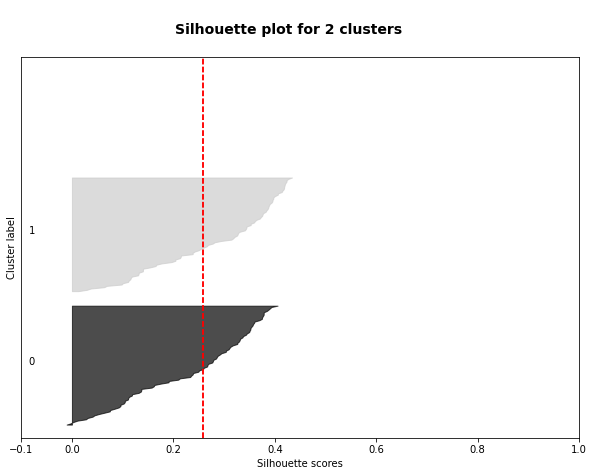

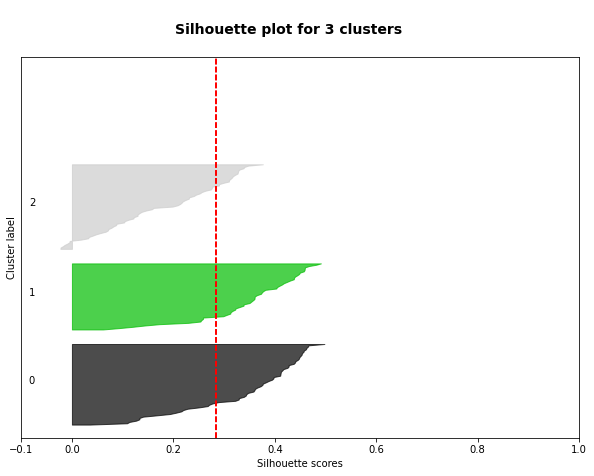

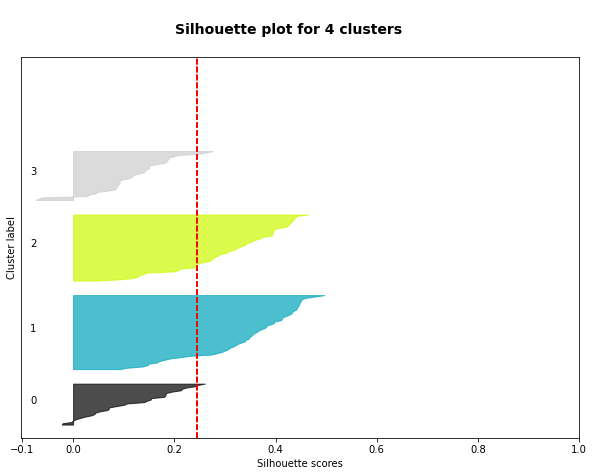

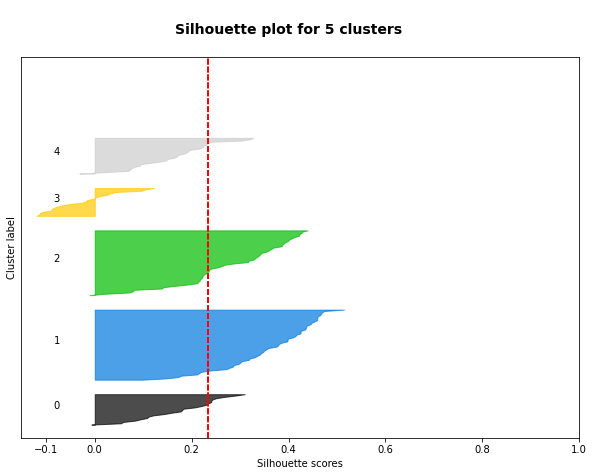

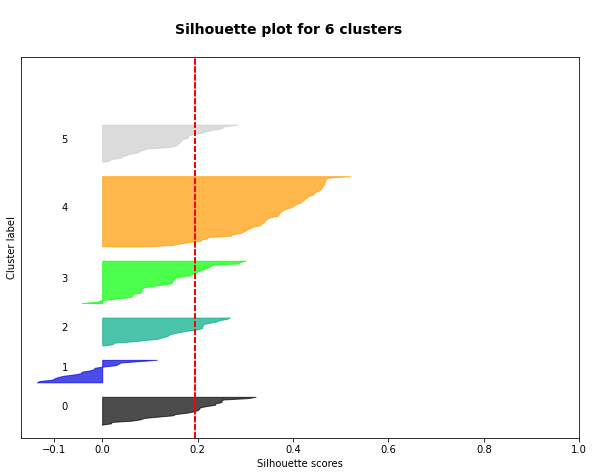

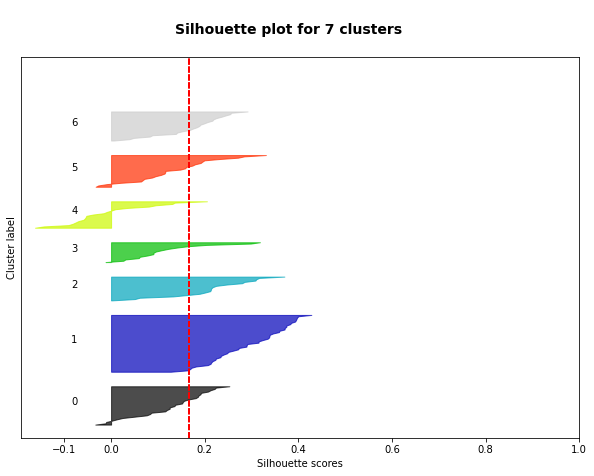

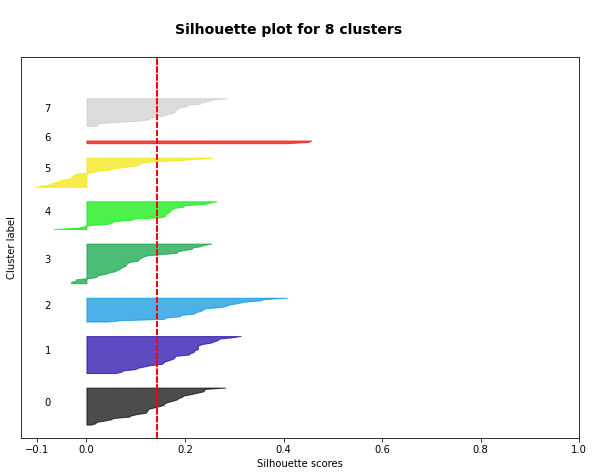

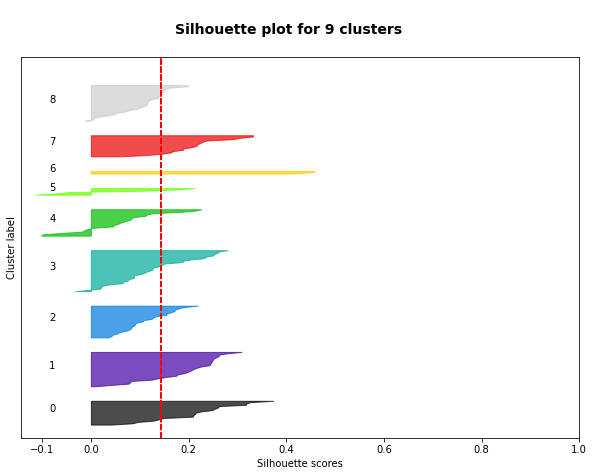

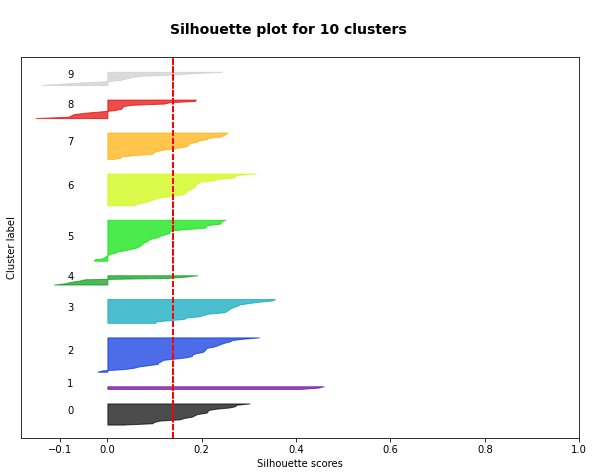

In [216]:


def silhouette_plot(X,num_clusters_to_check,k_means_models):

    for k in range(1,num_clusters_to_check):
      
      fig,ax1 = plt.subplots(1,1)
      fig.set_size_inches(10,7)
      
      
      #creating space between silhouette plots for each cluster
      ax1.set_ylim([0, len(X) + (num_clusters_to_check+1)*10])
      labels = k_means_models[k].fit_predict(X)
    
      SilhouetteScoreAverage = silhouette_score(X, labels) # average for all samples
      print("num_clusters:",k+1," silhouette_score:",SilhouetteScoreAverage)

      SilhouetteScore_each_sample = silhouette_samples(X, labels)
      
    #   ## computing silhouette scores for each ith_cluster in k(number of clusters)
      y_lower = 10

      for i in range(k+1):

        ith_cluster_silhouette_score = SilhouetteScore_each_sample[labels == i]
        ith_cluster_silhouette_score.sort()

        ith_cluster_size = ith_cluster_silhouette_score.shape[0]
        y_upper = y_lower + ith_cluster_size
        color = cm.nipy_spectral(float(i)/k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0,ith_cluster_silhouette_score,facecolor=color,edgecolor=color,alpha=0.7)
        ax1.text(-0.085, y_lower + 0.5 * ith_cluster_size, str(i))
        y_lower = y_upper + 10

    
        ax1.set_xlabel("Silhouette scores")
        ax1.set_ylabel("Cluster label")

        #vertical line for average silhouette score of all samples
        ax1.axvline(x=SilhouetteScoreAverage, color="red", linestyle="--")
        ax1.set_yticks([])
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.suptitle("\nSilhouette plot for %d clusters "% (k+1),fontsize=14,fontweight="bold",)

    plt.show()



silhouette_plot(X,num_clusters_to_check,k_means_models)




**On observing above elbow method and silhouette scores and silhouette plots**
# **Number of Clusters to fit the data will be = 3**


X_PCA: (178, 2)


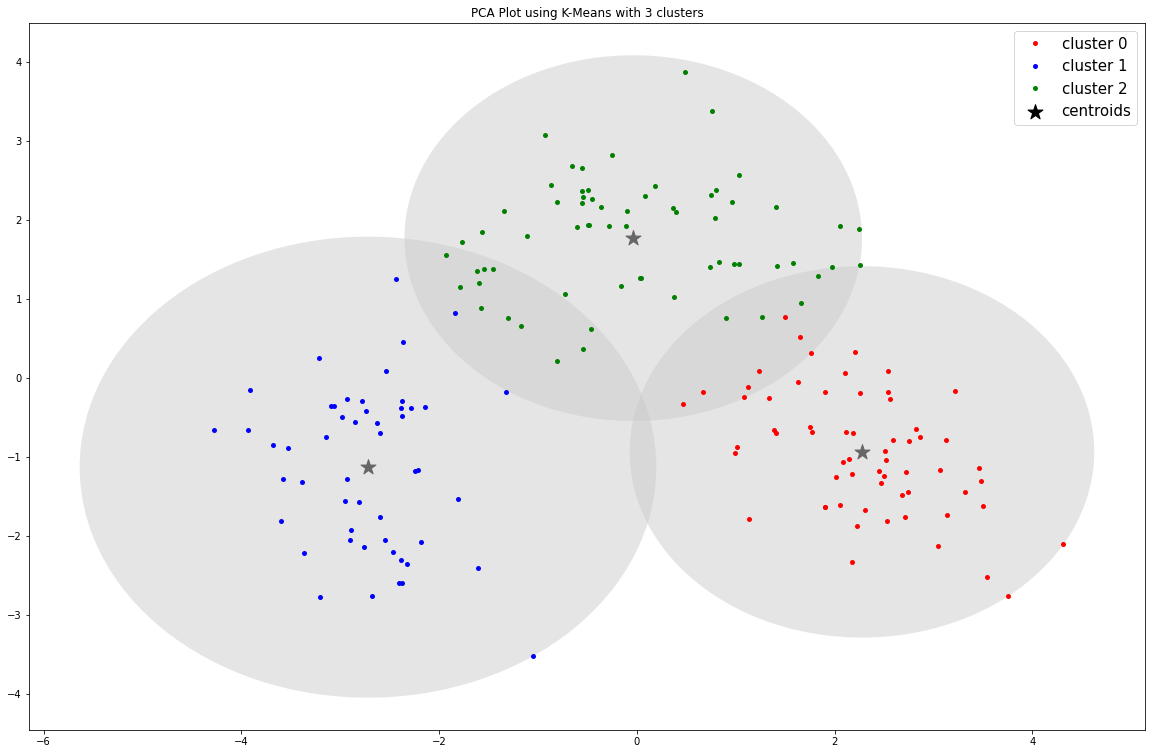

In [217]:

def PCA_plot(model,X,labels,centers,final_num_clusters):

  pca = PCA(n_components=2)
  pca.fit(X)
  X_PCA = pca.transform(X)
  X_PCA_centroids = pca.transform(centers)

  print("X_PCA:",X_PCA.shape)

  radii = [cdist(X_PCA[labels==i],[center]).max() for i,center in enumerate(X_PCA_centroids)]
  
  colors = {0: 'red', 1: 'blue', 2: 'green'}
  names = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2'}

  df = pd.DataFrame({'x': X_PCA[:, 0], 'y':X_PCA[:, 1], 'label':labels}) 
  groups = df.groupby('label')

  fig, ax = plt.subplots(figsize=(20, 13)) 


  for name, group in groups:
      label=names[name]
      ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
  
  plt.scatter(X_PCA_centroids[:,0],X_PCA_centroids[:,1],s=250, marker='*',c='black', edgecolor='black',label='centroids',alpha = 1) 

  for c, r in zip(X_PCA_centroids, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
      

  ax.legend(prop={"size":15})
  ax.set_title("PCA Plot using K-Means with 3 clusters")
  plt.show()
  

PCA_plot(k_means_models[2],X,k_means_models[2].predict(X),k_means_models[2].cluster_centers_,final_num_clusters=3)


# GMM


# **GMM followed by PCA**


In [218]:

def GMM(X,num_clusters,covariance_typ,kmeans_centers):

  gmm_model = GaussianMixture(n_components=num_clusters, covariance_type=covariance_typ, means_init = kmeans_centers,random_state=21).fit(X)
  labels = gmm_model.predict(X)
  probs = gmm_model.predict_proba(X)

  return gmm_model,labels


## Full ##

gmm_model_full,labels_full = GMM(X,3,'full',k_means_models[2].cluster_centers_)


## Diagonal ##

gmm_model_diagonal,labels_diagonal = GMM(X,3,'diag',k_means_models[2].cluster_centers_)


## Identity
gmm_model_identity,labels_identity = GMM(X,3,'spherical',k_means_models[2].cluster_centers_)





Full Covariance Matrix
X_PCA GMM: (178, 2)


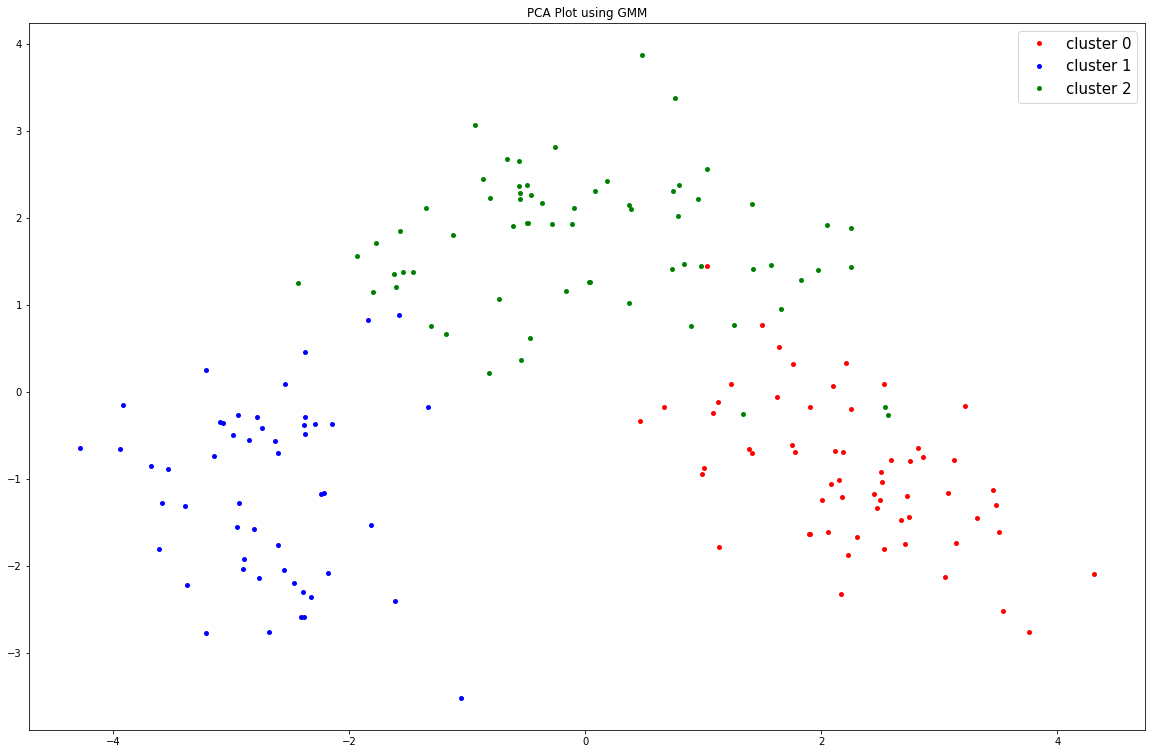

Diagonal Covariance Matrix
X_PCA GMM: (178, 2)


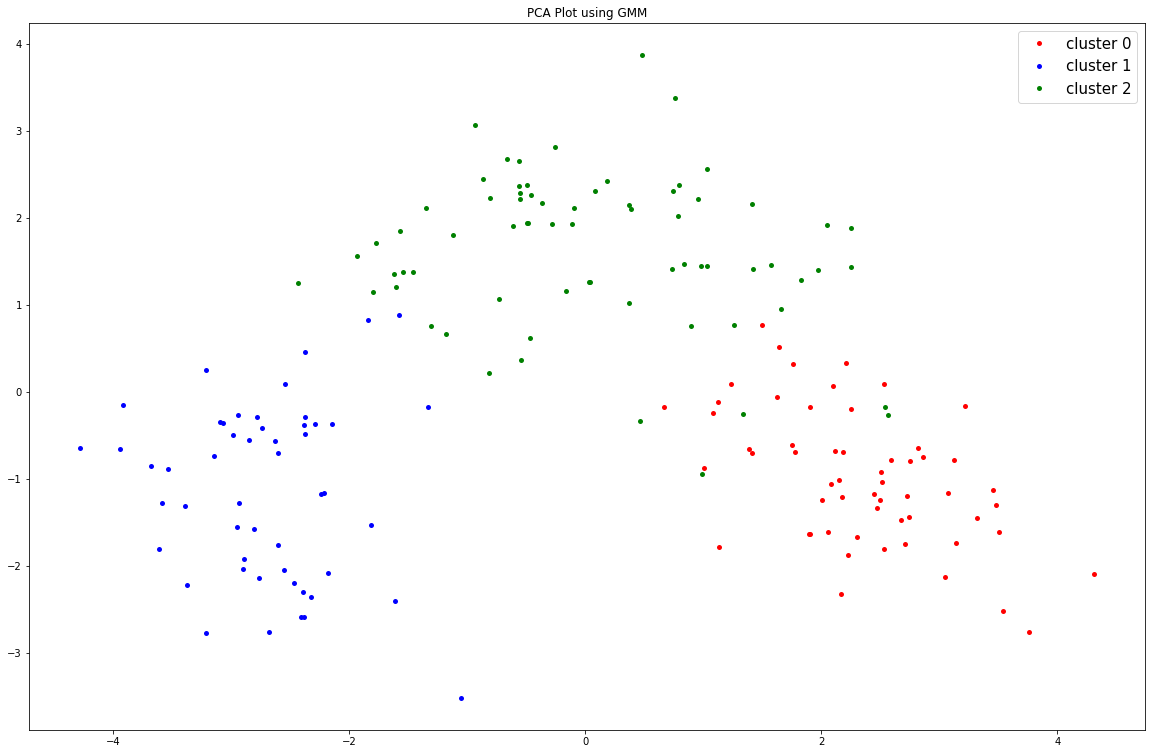

Identity Covariance Matrix
X_PCA GMM: (178, 2)


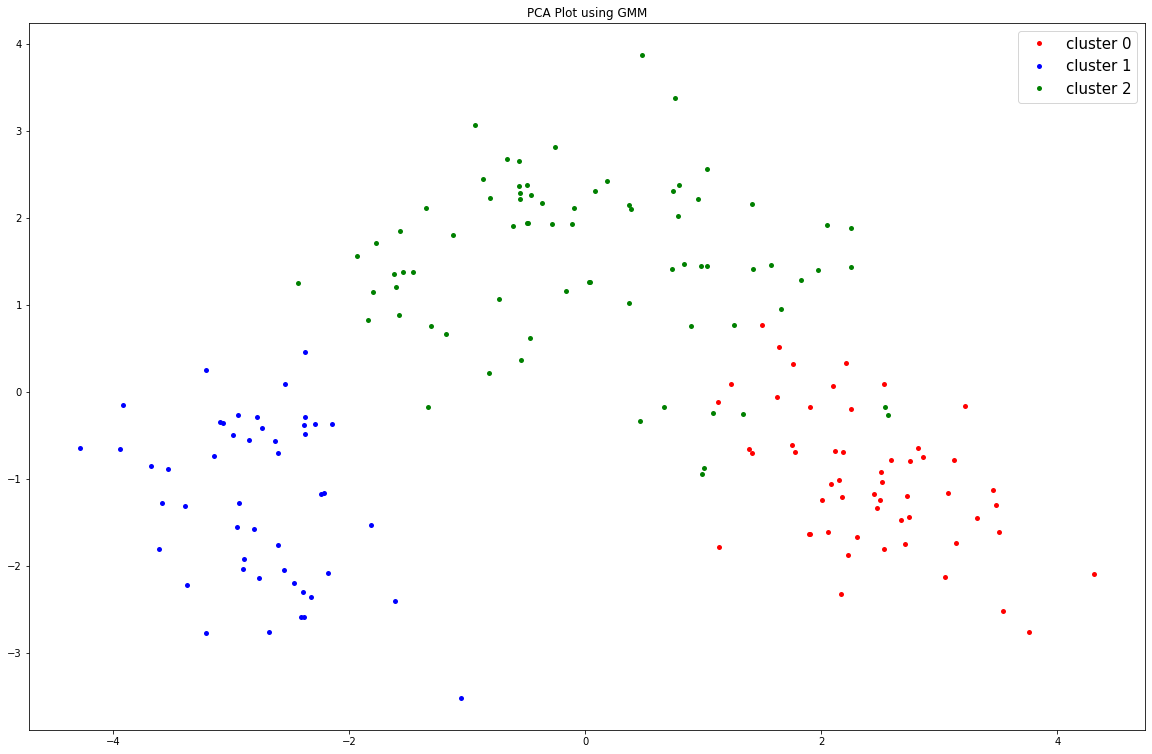

In [219]:

def PCA_plot_GMM(model,X,labels,final_num_clusters):

  pca = PCA(n_components=2)
  pca.fit(X)
  X_PCA = pca.transform(X)

  print("X_PCA GMM:",X_PCA.shape)

  
  colors = {0: 'red', 1: 'blue', 2: 'green'}
  names = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2'}

  df = pd.DataFrame({'x': X_PCA[:, 0], 'y':X_PCA[:, 1], 'label':labels}) 
  groups = df.groupby('label')

  fig, ax = plt.subplots(figsize=(20, 13)) 


  for name, group in groups:
      label=names[name]
      ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
  


  ax.legend(prop={"size":15})
  ax.set_title("PCA Plot using GMM")
  plt.show()
  
print("Full Covariance Matrix")
PCA_plot_GMM(gmm_model_full,X,labels_full,final_num_clusters=3)

print("Diagonal Covariance Matrix")
PCA_plot_GMM(gmm_model_diagonal,X,labels_diagonal,final_num_clusters=3)

print("Identity Covariance Matrix")
PCA_plot_GMM(gmm_model_identity,X,labels_identity,final_num_clusters=3)



# **PCA followed by K-Means**


In [220]:

X,Y = load_wine(return_X_y=True)

std_scaler = StandardScaler()
X_scalar = std_scaler.fit_transform(X)
pca1 = PCA(n_components=2)
pca1.fit(X_scalar)
X_PCA1 = pca1.transform(X_scalar)
print("X_PCA1:", X_PCA1.shape)

X_PCA1: (178, 2)


(10,)
(10,)


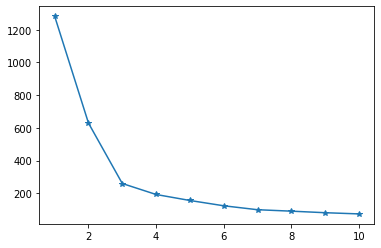

num_clusters: 2  silhouette_score: 0.4649140908920152
num_clusters: 3  silhouette_score: 0.5610505693103247
num_clusters: 4  silhouette_score: 0.4914213395710318
num_clusters: 5  silhouette_score: 0.4559244619913197
num_clusters: 6  silhouette_score: 0.4483651644133675
num_clusters: 7  silhouette_score: 0.4219428974727114
num_clusters: 8  silhouette_score: 0.4105709291196553
num_clusters: 9  silhouette_score: 0.3832977328888657
num_clusters: 10  silhouette_score: 0.37840104215399895


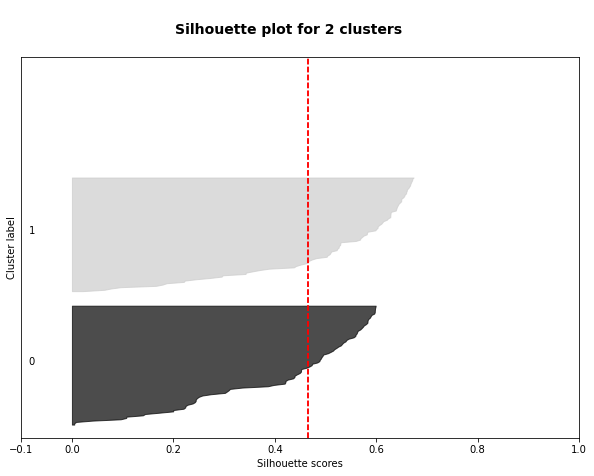

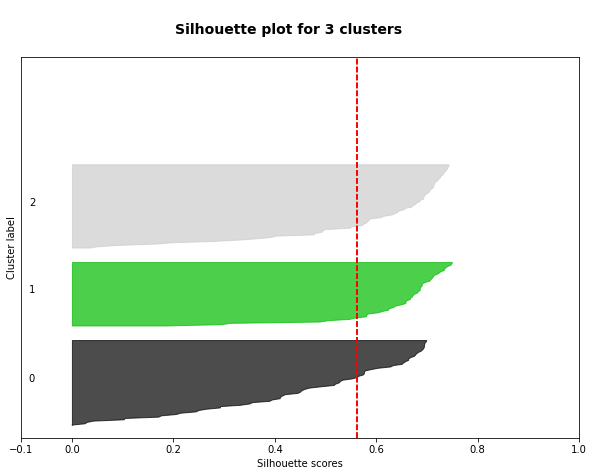

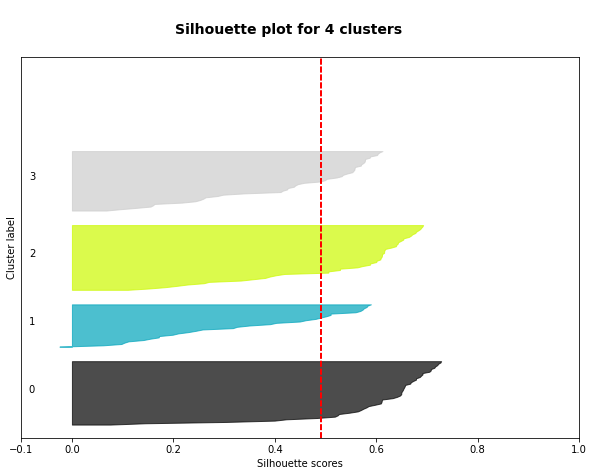

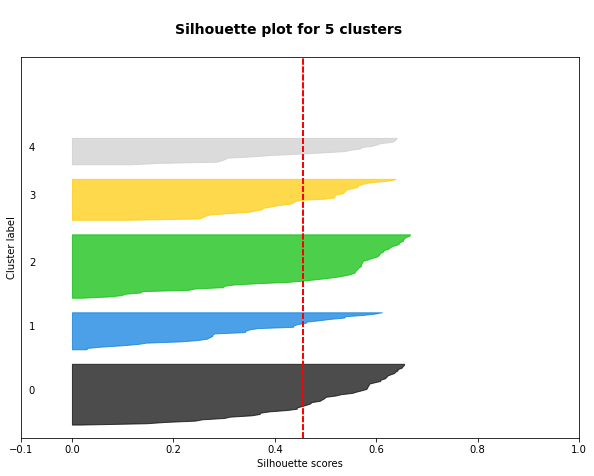

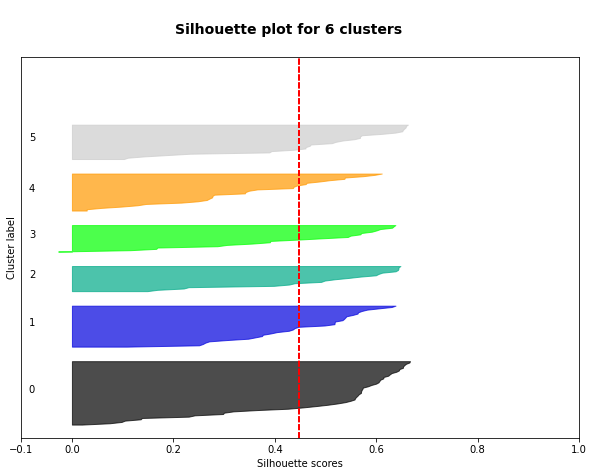

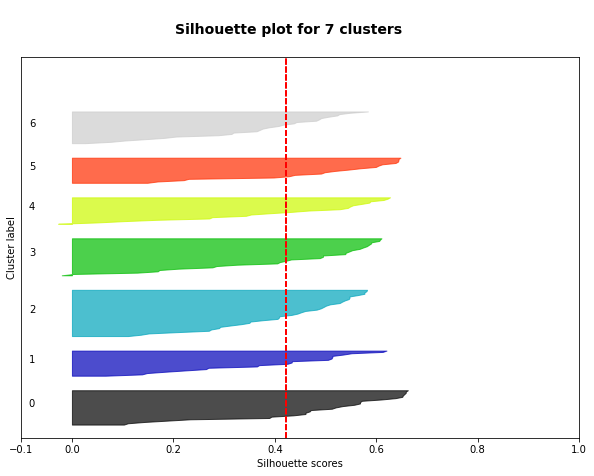

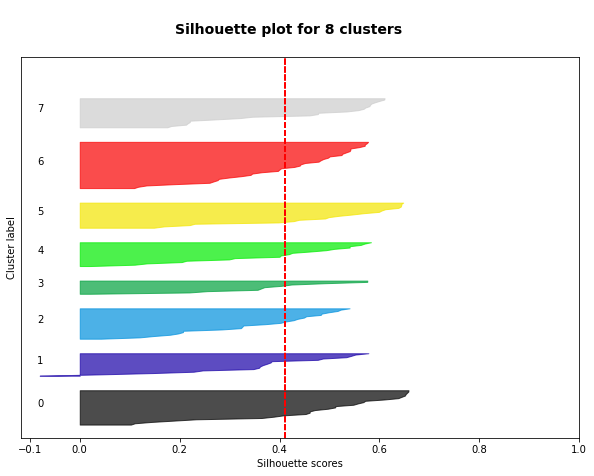

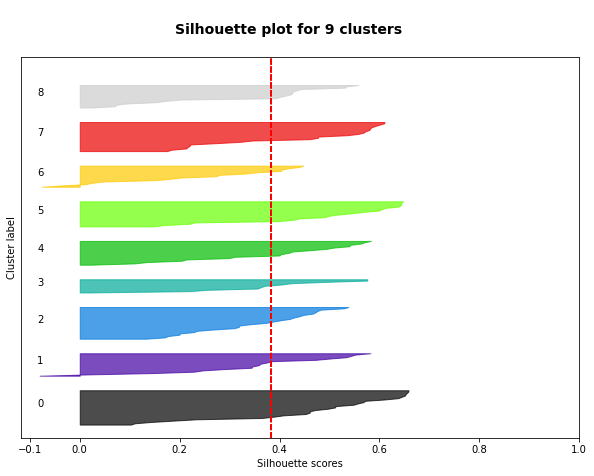

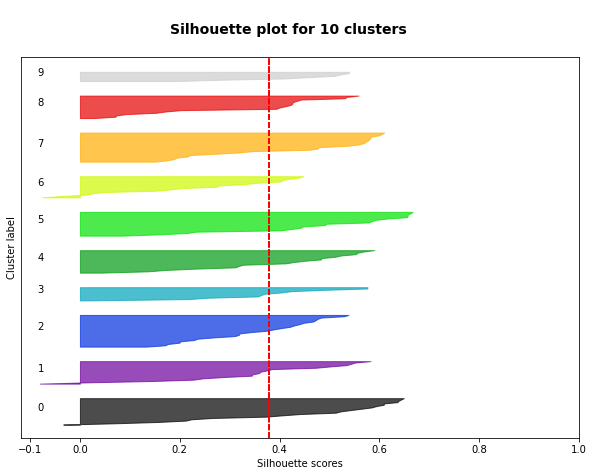

In [221]:
## kmeans 

num_clusters_to_check1 = 10
k_means_models1,inertias_distance_summation1 = Kmeans(X_PCA1,num_clusters_to_check1)
print(k_means_models1.shape)
print(inertias_distance_summation1.shape)

# elbow method
plt.plot(np.arange(1,num_clusters_to_check1+1),inertias_distance_summation1,marker='*')
plt.show()


silhouette_plot(X_PCA1,num_clusters_to_check1,k_means_models1)



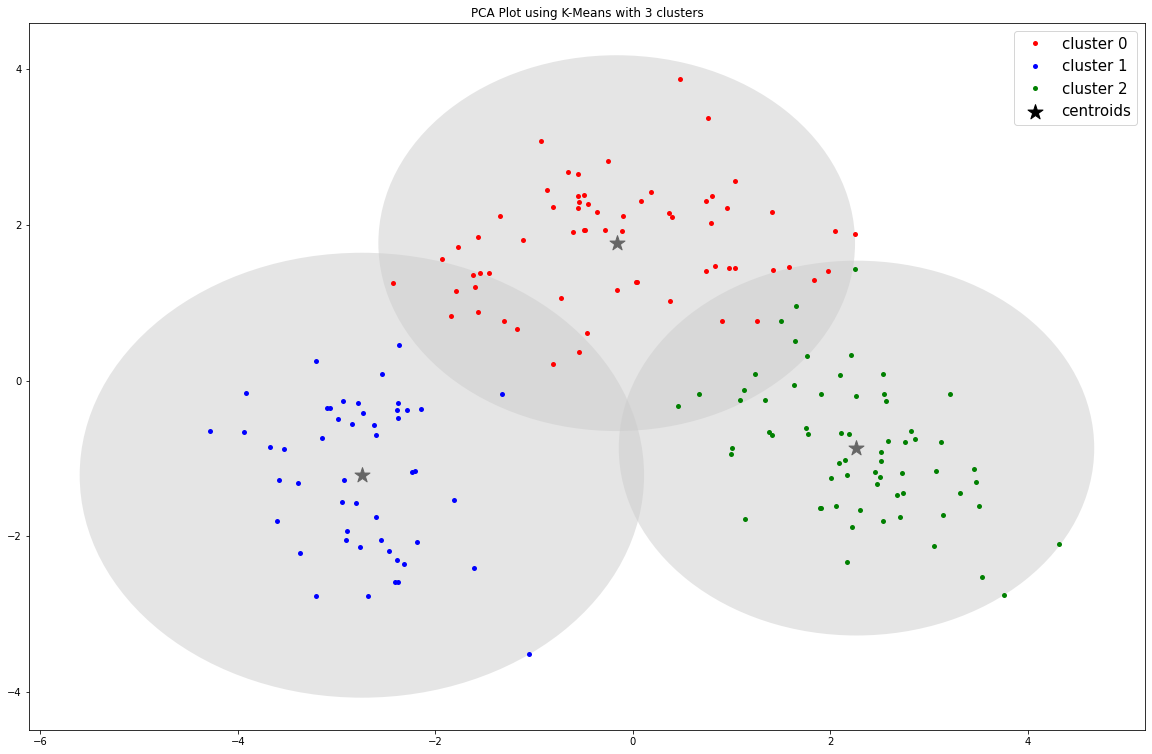

In [222]:
def PCA_followed_by_kmeans_plot(model,X,labels,centers,final_num_clusters):


  radii = [cdist(X[labels==i],[center]).max() for i,center in enumerate(centers)]

  
  colors = {0: 'red', 1: 'blue', 2: 'green'}
  names = {0: 'cluster 0', 1: 'cluster 1', 2: 'cluster 2'}

  df = pd.DataFrame({'x': X[:, 0], 'y':X[:, 1], 'label':labels}) 
  groups = df.groupby('label')

  fig, ax = plt.subplots(figsize=(20, 13)) 


  for name, group in groups:
      label=names[name]
      ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
  
  plt.scatter(centers[:,0],centers[:,1],s=250, marker='*',c='black', edgecolor='black',label='centroids',alpha = 1) 

  for c, r in zip(centers, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
      

  ax.legend(prop={"size":15})
  ax.set_title("PCA Plot using K-Means with 3 clusters")
  plt.show()
  

PCA_followed_by_kmeans_plot(k_means_models1[2],X_PCA1,k_means_models1[2].predict(X_PCA1),k_means_models1[2].cluster_centers_,final_num_clusters=3)


# **PCA followed by GMM**


In [223]:
## GMM

## Full ##

gmm_model_full1,labels_full1 = GMM(X_PCA1,3,'full',k_means_models1[2].cluster_centers_)


## Diagonal ##

gmm_model_diagonal1,labels_diagonal1 = GMM(X_PCA1,3,'diag',k_means_models1[2].cluster_centers_)


## Identity
gmm_model_identity1,labels_identity1 = GMM(X_PCA1,3,'spherical',k_means_models1[2].cluster_centers_)


Full Covariance Matrix


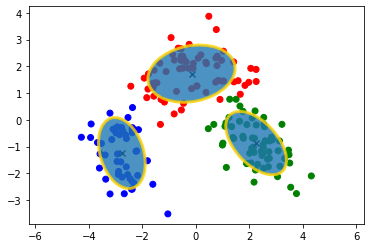

Diagonal Covariance Matrix


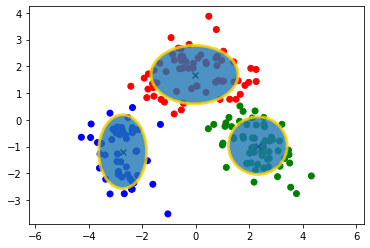

Identity Covariance Matrix


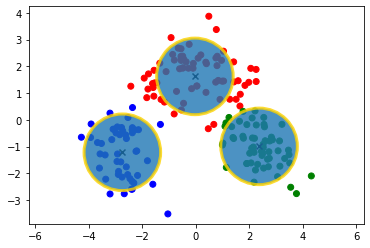

In [224]:


def PCA_followed_by_GMM_plot(gmm_model,data, labels, means, covariances):
    ax = plt.gca()
    ax.axis('equal')

    colors = ['red','blue','green']
    km_colors = [colors[label] for label in labels]
    ax.scatter(data[:,0], data[:,1], c=km_colors)
    ax.scatter(means[:,0], means[:,1], c= 'black', marker = "x")
    
    ty = 0

    if len(covariances.shape) ==2:
        ty =1
    elif len(covariances.shape) ==1:
        ty=2
        
    for i, (mean, color) in enumerate(zip(means, colors)):
        if ty == 0:
            covar = covariances[i]
            v, w = linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])

            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  
        elif ty ==1:
            covar = covariances[i]
            v = 2 * np.sqrt(2.0) * np.sqrt(covar)
            angle = 0
        elif ty ==2:
            covar = covariances[0]
            v = [2 * np.sqrt(2.0) * np.sqrt(covar),2 * np.sqrt(2.0) * np.sqrt(covar)]
            angle = 0
            
        ellipse = Ellipse(mean, v[0], v[1], 180.0 + angle, ec='#fcd200', fc= None, lw=3, alpha=0.8, zorder=1)
        ax.add_patch(ellipse)

    plt.show()



print("Full Covariance Matrix")
PCA_followed_by_GMM_plot(gmm_model_full1,X_PCA1,labels_full1,gmm_model_full1.means_,gmm_model_full1.covariances_)

print("Diagonal Covariance Matrix")
PCA_followed_by_GMM_plot(gmm_model_diagonal1,X_PCA1,labels_diagonal1,gmm_model_diagonal1.means_,gmm_model_diagonal1.covariances_)

print("Identity Covariance Matrix")
PCA_followed_by_GMM_plot(gmm_model_identity1,X_PCA1,labels_identity1,gmm_model_identity1.means_,gmm_model_identity1.covariances_)



# DATASET 2 - BREAST CANCER CLASSIFICATION

---





In [225]:
import pandas as pd
BreastCancer = pd.read_csv("/content/BreastCancer.csv")
BreastCancer = BreastCancer.drop(['Unnamed: 32'], axis=1)
X_1 = BreastCancer.iloc[:,2:].values
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X_1)
print(X.shape)



(569, 30)


# **K-means followed by PCA**






 

(10,)
(10,)


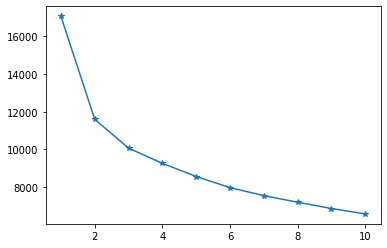

num_clusters: 2  silhouette_score: 0.3449740051034408
num_clusters: 3  silhouette_score: 0.3143840098608098
num_clusters: 4  silhouette_score: 0.2814748685818915
num_clusters: 5  silhouette_score: 0.17564864774698707
num_clusters: 6  silhouette_score: 0.1623342984960757
num_clusters: 7  silhouette_score: 0.15380731419772567
num_clusters: 8  silhouette_score: 0.13143186913523333
num_clusters: 9  silhouette_score: 0.14846949703298873
num_clusters: 10  silhouette_score: 0.1392799660081245


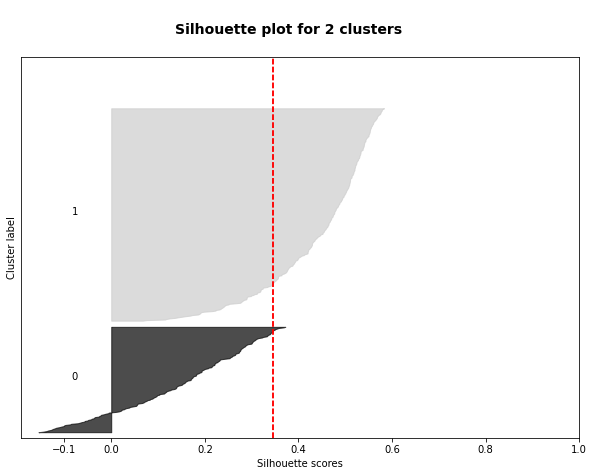

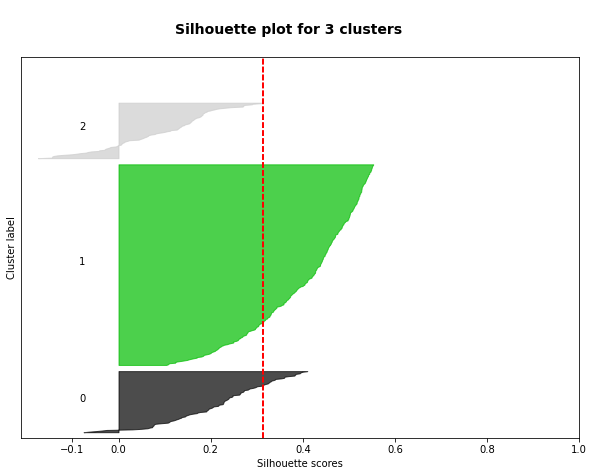

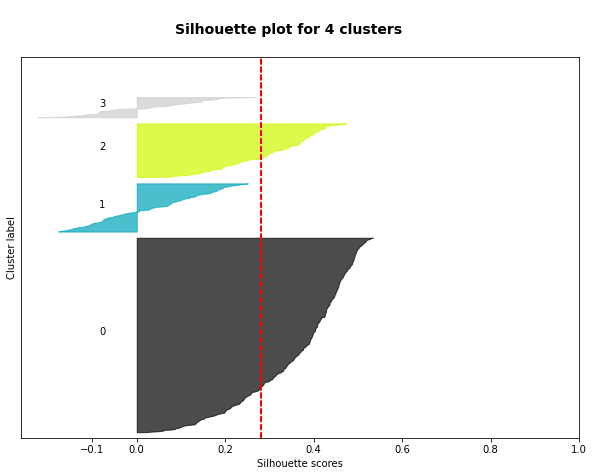

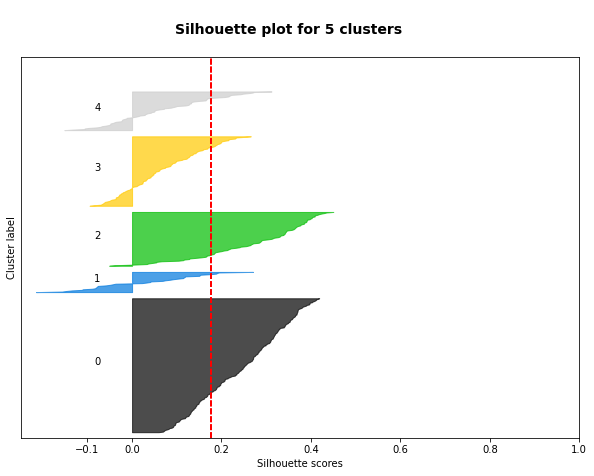

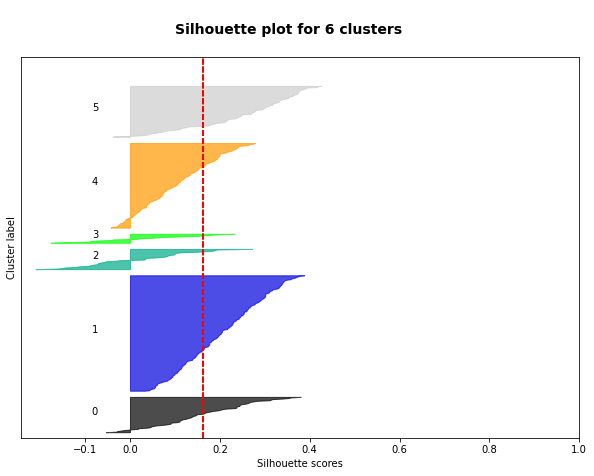

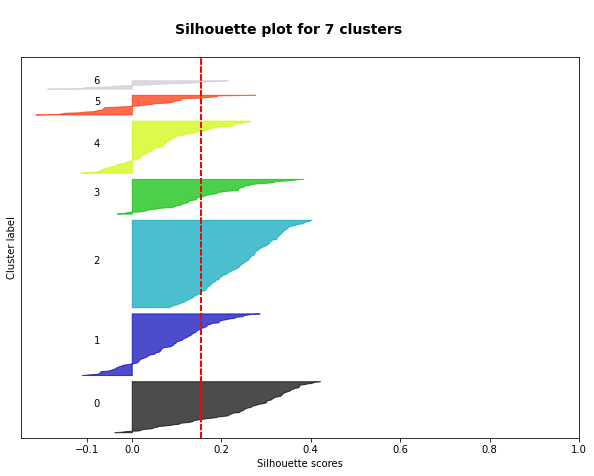

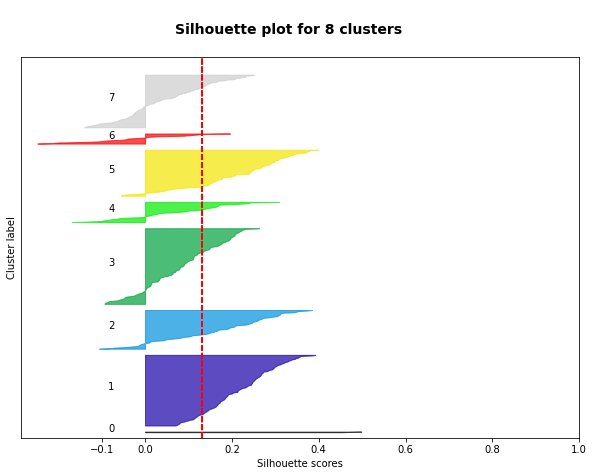

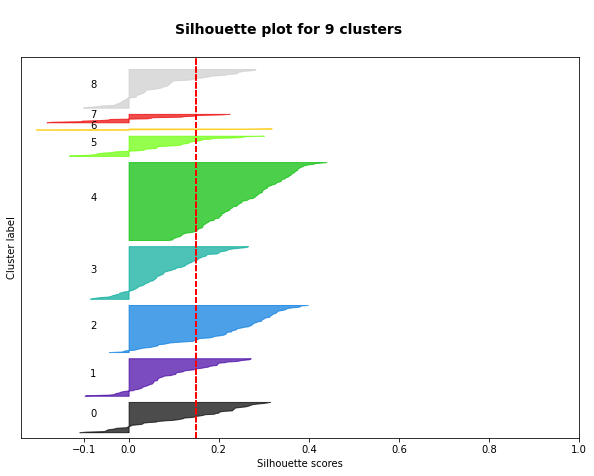

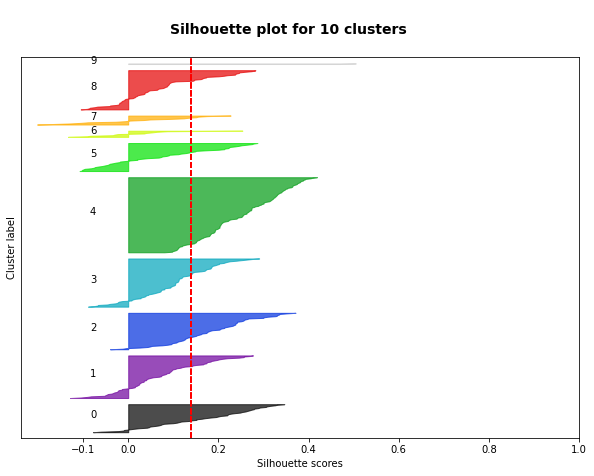

In [226]:
num_clusters_to_check2 = 10
k_means_models2,inertias_distance_summation2 = Kmeans(X,num_clusters_to_check)
print(k_means_models2.shape)
print(inertias_distance_summation2.shape)

# elbow method
plt.plot(np.arange(1,num_clusters_to_check2+1),inertias_distance_summation2,marker='*')
plt.show()

## got cluster = 2 from elbow method this written after visualizing elbow method plot ##

silhouette_plot(X,num_clusters_to_check2,k_means_models2)


X_PCA: (569, 2)


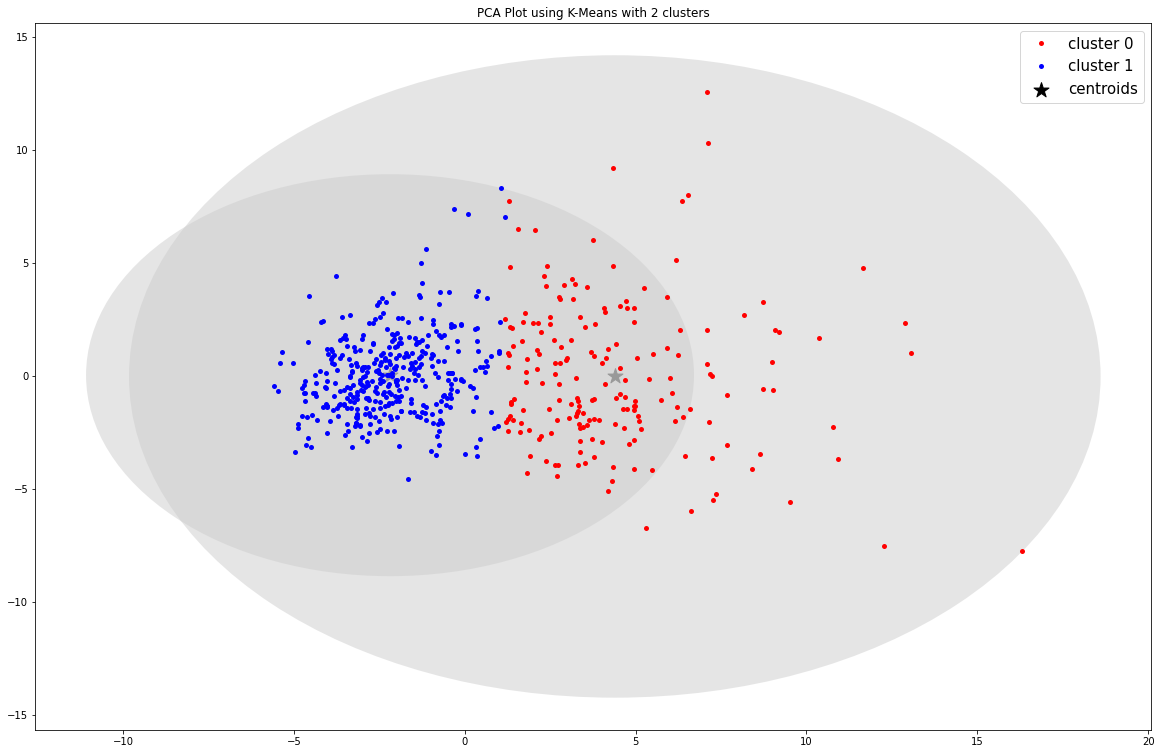

In [227]:

def PCA_plot2(model,X,labels,centers,final_num_clusters):

  pca = PCA(n_components=2)
  pca.fit(X)
  X_PCA = pca.transform(X)
  X_PCA_centroids = pca.transform(centers)

  print("X_PCA:",X_PCA.shape)

  radii = [cdist(X_PCA[labels==i],[center]).max() for i,center in enumerate(X_PCA_centroids)]
  
  colors = {0: 'red', 1: 'blue'}
  names = {0: 'cluster 0', 1: 'cluster 1'}

  df = pd.DataFrame({'x': X_PCA[:, 0], 'y':X_PCA[:, 1], 'label':labels}) 
  groups = df.groupby('label')

  fig, ax = plt.subplots(figsize=(20, 13)) 


  for name, group in groups:
      label=names[name]
      ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,color=colors[name],label=names[name], mec='none')
  
  plt.scatter(X_PCA_centroids[:,0],X_PCA_centroids[:,1],s=250, marker='*',c='black', edgecolor='black',label='centroids',alpha = 1) 

  for c, r in zip(X_PCA_centroids, radii):
    ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
      

  ax.legend(prop={"size":15})
  ax.set_title("PCA Plot using K-Means with 2 clusters")
  plt.show()
  

PCA_plot2(k_means_models2[1],X,k_means_models2[1].predict(X),k_means_models2[1].cluster_centers_,final_num_clusters=2)


# **GMM followed by PCA**


Full Covariance Matrix
X_PCA GMM: (569, 2)


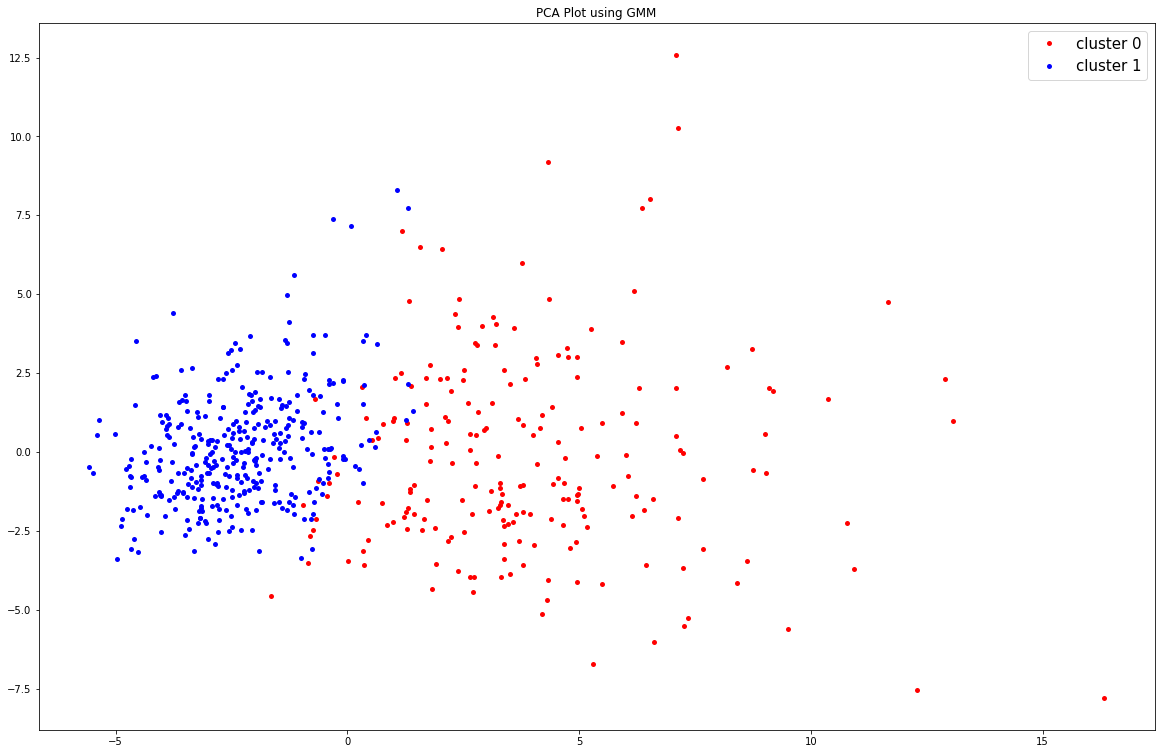

Diagonal Covariance Matrix
X_PCA GMM: (569, 2)


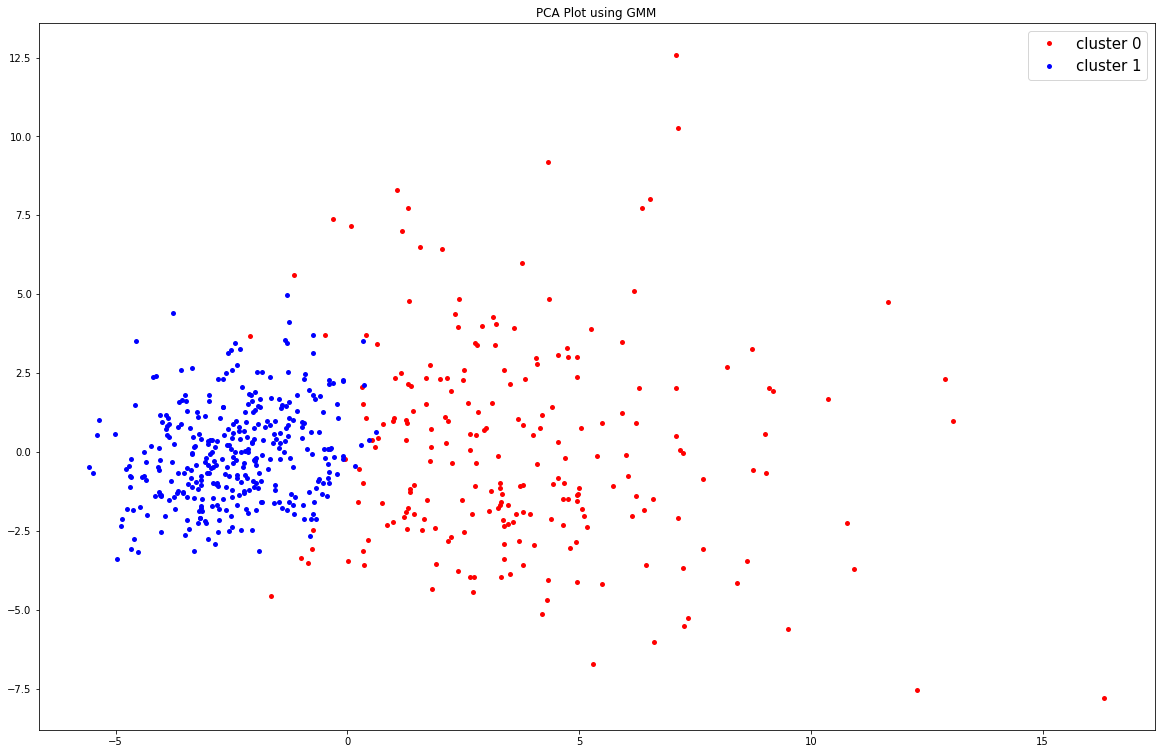

Identity Covariance Matrix
X_PCA GMM: (569, 2)


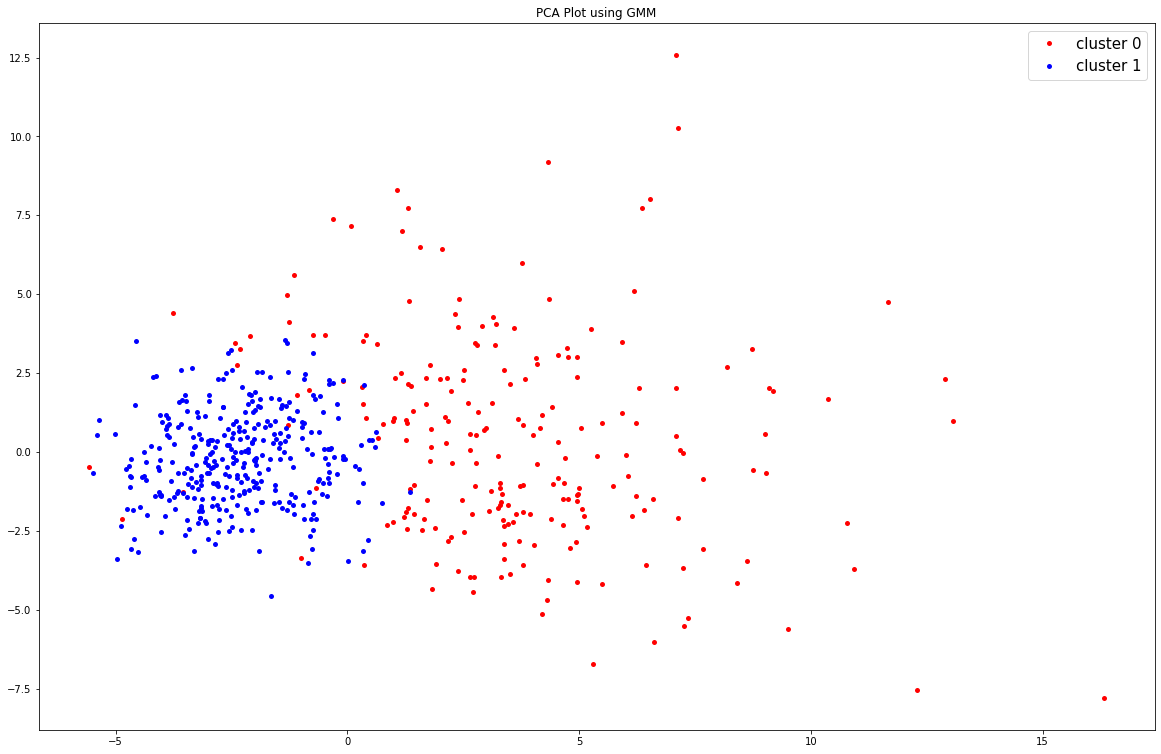

In [228]:
## Full ##

gmm_model_full2,labels_full2 = GMM(X,2,'full',k_means_models2[1].cluster_centers_)


## Diagonal ##

gmm_model_diagonal2,labels_diagonal2 = GMM(X,2,'diag',k_means_models2[1].cluster_centers_)


## Identity
gmm_model_identity2,labels_identity2 = GMM(X,2,'spherical',k_means_models2[1].cluster_centers_)


print("Full Covariance Matrix")
PCA_plot_GMM(gmm_model_full2,X,labels_full2,final_num_clusters=3)

print("Diagonal Covariance Matrix")
PCA_plot_GMM(gmm_model_diagonal2,X,labels_diagonal2,final_num_clusters=3)

print("Identity Covariance Matrix")
PCA_plot_GMM(gmm_model_identity2,X,labels_identity2,final_num_clusters=3)


# **PCA followed by K-Means**


In [229]:
BreastCancer = pd.read_csv("/content/BreastCancer.csv")
BreastCancer = BreastCancer.drop(['Unnamed: 32'], axis=1)
X_1 = BreastCancer.iloc[:,2:].values
std_scaler = StandardScaler()
X_scalar = std_scaler.fit_transform(X_1)

pca1 = PCA(n_components=2)
pca1.fit(X_scalar)
X_PCA3 = pca1.transform(X_scalar)
print("X_PCA3:", X_PCA3.shape)

X_PCA3: (569, 2)


(10,)
(10,)


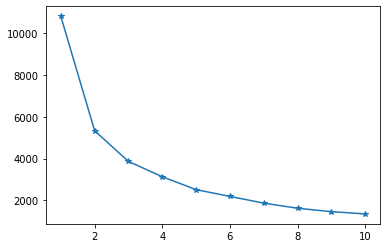

num_clusters: 2  silhouette_score: 0.508469019067218
num_clusters: 3  silhouette_score: 0.476672446074069
num_clusters: 4  silhouette_score: 0.4656018483069534
num_clusters: 5  silhouette_score: 0.36344947291703444
num_clusters: 6  silhouette_score: 0.35711643118208325
num_clusters: 7  silhouette_score: 0.365707758948111
num_clusters: 8  silhouette_score: 0.37245058459727653
num_clusters: 9  silhouette_score: 0.3407102072608541
num_clusters: 10  silhouette_score: 0.33804979895730847


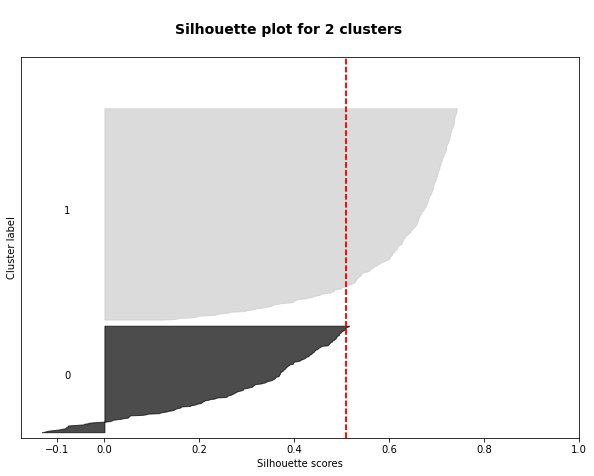

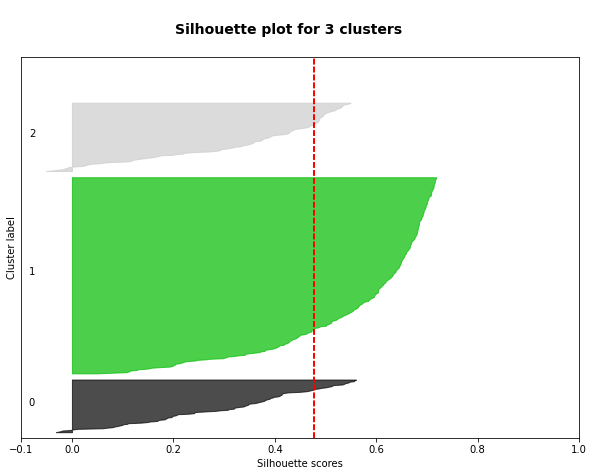

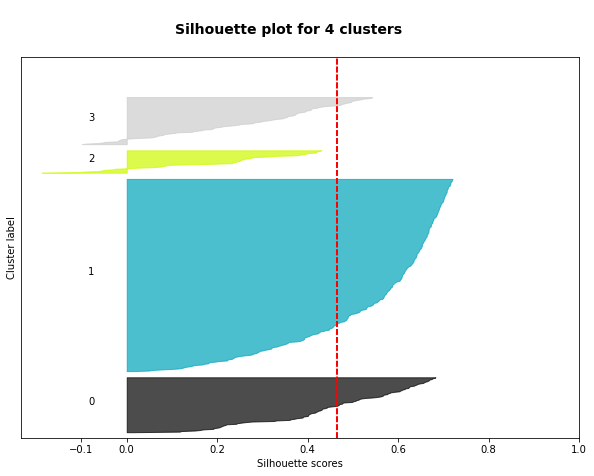

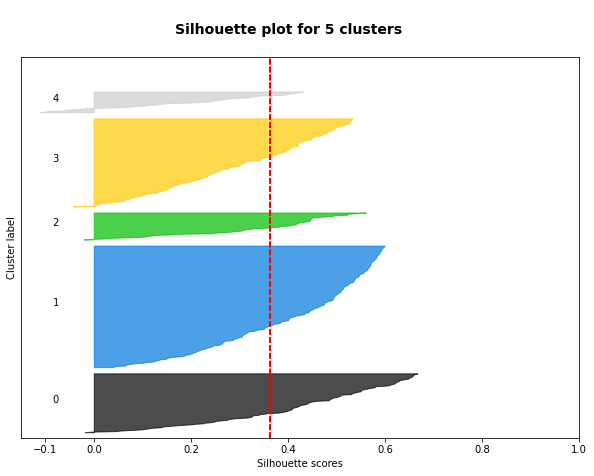

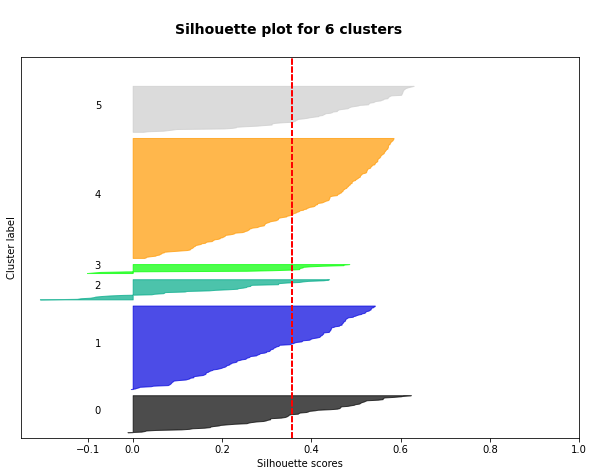

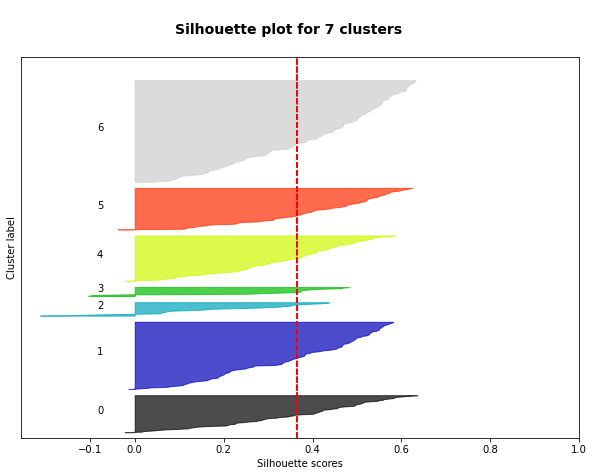

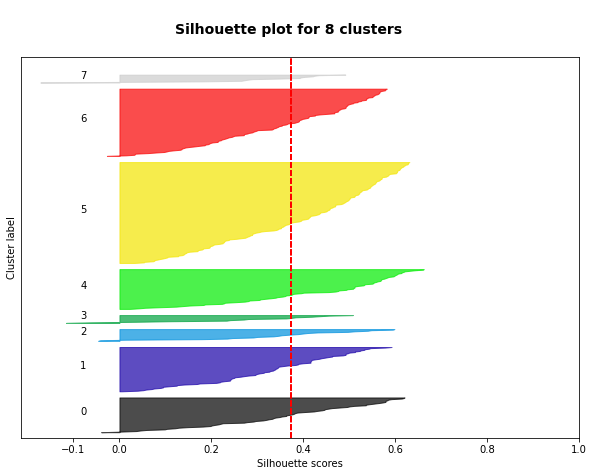

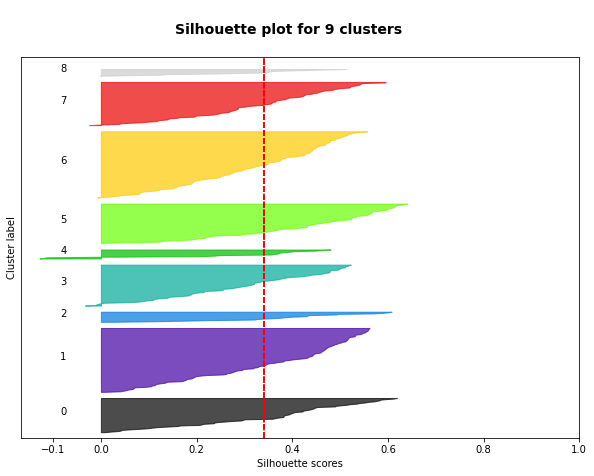

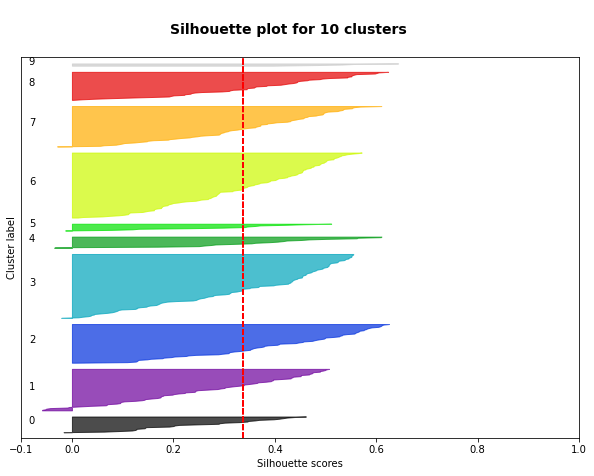

In [230]:
## kmeans 

num_clusters_to_check3 = 10
k_means_models3,inertias_distance_summation3 = Kmeans(X_PCA3,num_clusters_to_check1)
print(k_means_models3.shape)
print(inertias_distance_summation3.shape)

# elbow method
plt.plot(np.arange(1,num_clusters_to_check3+1),inertias_distance_summation3,marker='*')
plt.show()

## got cluster = 2 from elbow method this written after visualizing elbow method plot ##


silhouette_plot(X_PCA3,num_clusters_to_check3,k_means_models3)



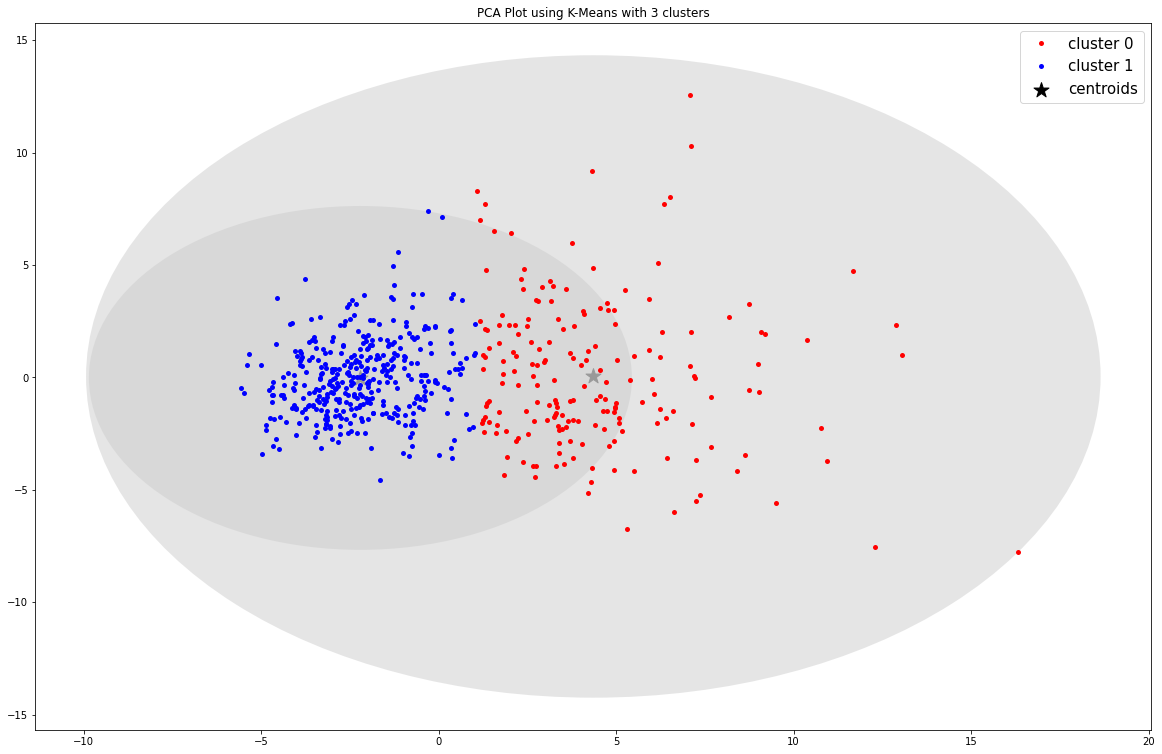

In [231]:
PCA_followed_by_kmeans_plot(k_means_models3[1],X_PCA3,k_means_models3[1].predict(X_PCA3),k_means_models3[1].cluster_centers_,final_num_clusters=3)


# **PCA followed by GMM**


In [232]:
## GMM

## Full ##

gmm_model_full3,labels_full3 = GMM(X_PCA3,2,'full',k_means_models3[1].cluster_centers_)


## Diagonal ##

gmm_model_diagonal3,labels_diagonal3 = GMM(X_PCA3,2,'diag',k_means_models3[1].cluster_centers_)


## Identity
gmm_model_identity3,labels_identity3 = GMM(X_PCA3,2,'spherical',k_means_models3[1].cluster_centers_)


Full Covariance Matrix


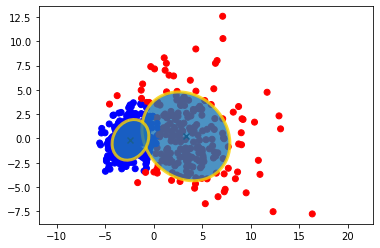

Diagonal Covariance Matrix


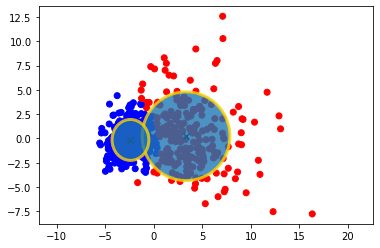

Identity Covariance Matrix


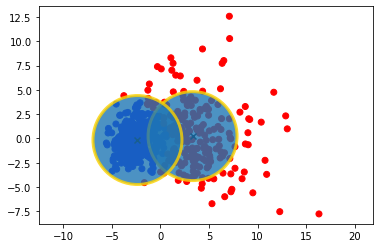

In [233]:

def PCA_followed_by_GMM_plot(gmm_model,data, labels, means, covariances):
    ax = plt.gca()
    ax.axis('equal')

    colors = ['red','blue']
    km_colors = [colors[label] for label in labels]
    ax.scatter(data[:,0], data[:,1], c=km_colors)
    ax.scatter(means[:,0], means[:,1], c= 'black', marker = "x")
    
    ty = 0

    if len(covariances.shape) ==2:
        ty =1
    elif len(covariances.shape) ==1:
        ty=2
        
    for i, (mean, color) in enumerate(zip(means, colors)):
        if ty == 0:
            covar = covariances[i]
            v, w = linalg.eigh(covar)
            v = 2.0 * np.sqrt(2.0) * np.sqrt(v)
            u = w[0] / linalg.norm(w[0])

            angle = np.arctan(u[1] / u[0])
            angle = 180.0 * angle / np.pi  
        elif ty ==1:
            covar = covariances[i]
            v = 2 * np.sqrt(2.0) * np.sqrt(covar)
            angle = 0
        elif ty ==2:
            covar = covariances[0]
            v = [2 * np.sqrt(2.0) * np.sqrt(covar),2 * np.sqrt(2.0) * np.sqrt(covar)]
            angle = 0
            
        ellipse = Ellipse(mean, v[0], v[1], 180.0 + angle, ec='#fcd200', fc= None, lw=3, alpha=0.8, zorder=1)
        ax.add_patch(ellipse)

    plt.show()



print("Full Covariance Matrix")
PCA_followed_by_GMM_plot(gmm_model_full3,X_PCA3,labels_full3,gmm_model_full3.means_,gmm_model_full3.covariances_)

print("Diagonal Covariance Matrix")
PCA_followed_by_GMM_plot(gmm_model_diagonal3,X_PCA3,labels_diagonal3,gmm_model_diagonal3.means_,gmm_model_diagonal3.covariances_)

print("Identity Covariance Matrix")
PCA_followed_by_GMM_plot(gmm_model_identity3,X_PCA3,labels_identity3,gmm_model_identity3.means_,gmm_model_identity3.covariances_)

